In [1]:
import pandas as pd

In [ ]:
cd ~\Desktop\\Repositories\\Gilman_earning\\Python_tutorials\data_files

In [2]:
cd data_files

/Users/alexeygilman/repos/Gilman_earning/Python_tutorials/data_files


In [3]:
###### Importing data and dropping Nan Rows ###############
df_0 = pd.read_excel("K78_SFPM.xlsx", sheet_name = "Data", header = [0,1])
df_0.dropna(axis = 1, how = "all", inplace = True)

# Mmulti-index Columns


### Levels of multi-index

Can access levels of hierarchical index - very useful for real world datasets


In [4]:
# Can identify all the values in each column-level  index

df_0.columns # returns a list of tuples, each value in each tuple returns a level value for that row 

MultiIndex([('Viable Cell Density (10e5 cell/ml)', 'Condition'),
            ('Viable Cell Density (10e5 cell/ml)',     'Flask'),
            ('Viable Cell Density (10e5 cell/ml)',           3),
            ('Viable Cell Density (10e5 cell/ml)',           6),
            ('Viable Cell Density (10e5 cell/ml)',           9),
            ('Viable Cell Density (10e5 cell/ml)',          12),
            ('Viable Cell Density (10e5 cell/ml)',          14),
            (              'ICA ((cells/ml)*day)',           3),
            (              'ICA ((cells/ml)*day)',           6),
            (              'ICA ((cells/ml)*day)',           9),
            (              'ICA ((cells/ml)*day)',          12),
            (              'ICA ((cells/ml)*day)',          14),
            (                         '% Viable ',           3),
            (                         '% Viable ',           6),
            (                         '% Viable ',           9),
            (            

In [5]:
# can selec individual levels of the columns index (returns the values present in the index)
print(df_0.columns.get_level_values(0))
print("\n")
print("\n")
print(df_0.columns.get_level_values(1))


Index(['Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)',
       'Viable Cell Density (10e5 cell/ml)', 'ICA ((cells/ml)*day)',
       'ICA ((cells/ml)*day)', 'ICA ((cells/ml)*day)', 'ICA ((cells/ml)*day)',
       'ICA ((cells/ml)*day)', '% Viable ', '% Viable ', '% Viable ',
       '% Viable ', '% Viable ', 'Titer (ug/ml)', 'Titer (ug/ml)',
       'Titer (ug/ml)', 'Titer (ug/ml)'],
      dtype='object')




Index(['Condition',     'Flask',           3,           6,           9,
                12,          14,           3,           6,           9,
                12,          14,           3,           6,           9,
                12,          14,           6,           9,          12,
                14],
      dtype='object')


### slicing column level index

Can slice across the hierarchical column levels

In [6]:
#select level0 value

df_0["ICA ((cells/ml)*day)"].head()

,3,6,9,12,14
0,25.860,63.540,97.110,123.315,135.030
1,27.720,68.670,103.785,129.480,140.610
2,30.900,73.650,107.865,129.015,136.050
3,31.470,74.820,110.070,132.795,140.370
4,47.655,112.155,165.555,210.405,229.305


In [7]:
#select level 0 value and list of level1 values

df_0["ICA ((cells/ml)*day)"][[3,6,9]].head()

,3,6,9
0,25.860,63.540,97.110
1,27.720,68.670,103.785
2,30.900,73.650,107.865
3,31.470,74.820,110.070
4,47.655,112.155,165.555


In [8]:
# using the loc method may be more proper for more complex slices
df_0.loc[:, (["ICA ((cells/ml)*day)"],[3,6,9])].head()

ICA ((cells/ml)*day)                  
                     3        6        9
0               25.860   63.540   97.110
1               27.720   68.670  103.785
2               30.900   73.650  107.865
3               31.470   74.820  110.070
4               47.655  112.155  165.555

In [9]:
# Can select all the level0 and list from level 1 using slice
df_0.loc[:, (slice(None),[3,6,9])].head()

Viable Cell Density (10e5 cell/ml)              ICA ((cells/ml)*day)  \
                                   3     6      9                    3   
0                               4.84  12.4  12.72               25.860   
1                               4.88  13.6  13.70               27.720   
2                               5.50  15.1  13.40               30.900   
3                               5.48  15.5  13.40               31.470   
4                               7.07  24.7  18.30               47.655   

                    % Viable              Titer (ug/ml)          
         6        9         3     6     9             6       9  
0   63.540   97.110      97.0  95.1  90.5         533.9   947.5  
1   68.670  103.785      97.3  94.3  89.2         502.8   949.9  
2   73.650  107.865      96.0  94.0  84.3         535.4  1187.5  
3   74.820  110.070      96.8  93.9  85.0         528.5  1127.6  
4  112.155  165.555      99.1  98.3  97.1         633.9  1371.5

In [10]:
#can slice level 0 index, but neet to lexicographically order columns first
df_0.sort_index(axis =1, level = [0,1], ascending = True, inplace = True)

# Can select all the level0 and list from level 1 using slice
df_0.loc[:, (slice('% Viable ','Titer (ug/ml)'),[3,6,9])].head()

% Viable              ICA ((cells/ml)*day)                   Titer (ug/ml)  \
          3     6     9                    3        6        9             6   
0      97.0  95.1  90.5               25.860   63.540   97.110         533.9   
1      97.3  94.3  89.2               27.720   68.670  103.785         502.8   
2      96.0  94.0  84.3               30.900   73.650  107.865         535.4   
3      96.8  93.9  85.0               31.470   74.820  110.070         528.5   
4      99.1  98.3  97.1               47.655  112.155  165.555         633.9   

           
        9  
0   947.5  
1   949.9  
2  1187.5  
3  1127.6  
4  1371.5

### Set condition and flask as index, for 

In [11]:
# set_index required tuple coordinates for both level 0 and level 1 keys for the index 
df_0.set_index(("Viable Cell Density (10e5 cell/ml)", "Condition"), inplace = True)
df_0.set_index(("Viable Cell Density (10e5 cell/ml)", "Flask"), inplace = True, append = True)

In [12]:
# Change the names of the index
df_0.index.names = ["Clone", "Flask ID"]

In [13]:
df_0.columns.names = ["Parameter", "Day #"]

In [14]:
df_0.head()

Parameter        % Viable                          ICA ((cells/ml)*day)  \
Day #                   3     6     9     12    14                   3    
Clone   Flask ID                                                          
Clone 1 SF01          97.0  95.1  90.5  71.6  62.4               25.860   
        SF02          97.3  94.3  89.2  70.0  58.6               27.720   
Clone 2 SF03          96.0  94.0  84.3  62.4  28.8               30.900   
        SF04          96.8  93.9  85.0  63.2  32.9               31.470   
Clone 3 SF05          99.1  98.3  97.1  93.9  78.4               47.655   

Parameter                                            Titer (ug/ml)          \
Day #                  6        9        12       14            6       9    
Clone   Flask ID                                                             
Clone 1 SF01       63.540   97.110  123.315  135.030         533.9   947.5   
        SF02       68.670  103.785  129.480  140.610         502.8   949.9   
Clone 2 SF03       73.650  107.865  129.015  136.050         535.4  1187.5   
        SF04       74.820  110.070  132.795  140.370         528.5  1127.6   
Clone 3 SF05      112.155  165.555  210.405  229.305         633.9  1371.5   

Parameter                        Viable Cell Density (10e5 cell/ml)        \
Day #                 12      14                                 3     6    
Clone   Flask ID                                                            
Clone 1 SF01      1269.0  1442.5                               4.84  12.4   
        SF02      1230.2  1357.5                               4.88  13.6   
Clone 2 SF03      1626.4  1759.8                               5.50  15.1   
        SF04      1616.1  1567.7                               5.48  15.5   
Clone 3 SF05      2030.8  2360.0                               7.07  24.7   

Parameter                              
Day #                9      12     14  
Clone   Flask ID                       
Clone 1 SF01      12.72   9.66   7.81  
        SF02      13.70   9.71   7.42  
Clone 2 SF03      13.40   9.41   4.69  
        SF04      13.40  10.10   5.05  
Clone 3 SF05      18.30  17.30  12.60

# OK, taking several side paths to explore data manipulation tools

-Best way to filter for max day 14?
    - Day# as column then filter ascending day 14 titer max?
    - or day # as index, select day 14, and then filter ascending 
    
Is there value for having clone as index? Is there value to having day# as columns? Running describe on day 14, grouped by clone# - for this I want mean, min, max



In [25]:
df_d14 = df_0.loc[:,(slice(None),14)]
df_d14.head()

Parameter        % Viable  ICA ((cells/ml)*day) Titer (ug/ml)  \
Day #                   14                   14            14   
Clone   Flask ID                                                
Clone 1 SF01          62.4              135.030        1442.5   
        SF02          58.6              140.610        1357.5   
Clone 2 SF03          28.8              136.050        1759.8   
        SF04          32.9              140.370        1567.7   
Clone 3 SF05          78.4              229.305        2360.0   

Parameter        Viable Cell Density (10e5 cell/ml)  
Day #                                            14  
Clone   Flask ID                                     
Clone 1 SF01                                   7.81  
        SF02                                   7.42  
Clone 2 SF03                                   4.69  
        SF04                                   5.05  
Clone 3 SF05                                  12.60

In [33]:
df_d14.columns = ['% Viable ', 'ICA ((cells/ml)*day)', 'Titer (ug/ml)',
       'Viable Cell Density (10e5 cell/ml)']
df_d14.head()

% Viable   ICA ((cells/ml)*day)  Titer (ug/ml)  \
Clone   Flask ID                                                   
Clone 1 SF01           62.4               135.030         1442.5   
        SF02           58.6               140.610         1357.5   
Clone 2 SF03           28.8               136.050         1759.8   
        SF04           32.9               140.370         1567.7   
Clone 3 SF05           78.4               229.305         2360.0   

                  Viable Cell Density (10e5 cell/ml)  
Clone   Flask ID                                      
Clone 1 SF01                                    7.81  
        SF02                                    7.42  
Clone 2 SF03                                    4.69  
        SF04                                    5.05  
Clone 3 SF05                                   12.60

In [57]:
#grouping by clone, describing the stats, and selecting min, max, mean
df_d14_stats = df_d14.groupby("Clone").describe().loc[:,(slice(None), ["min", "mean", "max"])]

In [66]:
#reordering the dataframe by sorter mean titer values
ind = df_d14_stats.loc[:,("Titer (ug/ml)","mean")].sort_values(ascending = False).index
df_d14 = df_d14_stats.reindex(ind)

In [67]:
df_d14.head()

% Viable              ICA ((cells/ml)*day)                    \
              mean   min   max                 mean      min      max   
Clone                                                                   
Clone 16     78.00  77.7  78.3             222.6675  216.315  229.020   
Clone 9      64.90  64.1  65.7             234.9300  233.850  236.010   
Clone 6      64.50  63.5  65.5             200.6625  196.665  204.660   
Clone 12     74.70  74.4  75.0             234.7650  228.465  241.065   
Clone 8      84.25  82.3  86.2             179.9250  175.125  184.725   

         Titer (ug/ml)                 Viable Cell Density (10e5 cell/ml)  \
                  mean     min     max                               mean   
Clone                                                                       
Clone 16       3087.65  2952.0  3223.3                              14.85   
Clone 9        3079.95  3001.4  3158.5                              15.10   
Clone 6        2630.55  2563.4  2697.7                              11.30   
Clone 12       2624.70  2609.8  2639.6                              13.95   
Clone 8        2471.05  2439.8  2502.3                              10.40   

                      
           min   max  
Clone                 
Clone 16  14.6  15.1  
Clone 9   14.8  15.4  
Clone 6   11.0  11.6  
Clone 12  13.8  14.1  
Clone 8   10.0  10.8

In [83]:
top5 = df_d14.head().index
df_d14

% Viable              ICA ((cells/ml)*day)                    \
              mean   min   max                 mean      min      max   
Clone                                                                   
Clone 16     78.00  77.7  78.3             222.6675  216.315  229.020   
Clone 9      64.90  64.1  65.7             234.9300  233.850  236.010   
Clone 6      64.50  63.5  65.5             200.6625  196.665  204.660   
Clone 12     74.70  74.4  75.0             234.7650  228.465  241.065   
Clone 8      84.25  82.3  86.2             179.9250  175.125  184.725   
Clone 7      54.00  53.3  54.7             248.7000  243.915  253.485   
Clone 3      81.00  78.4  83.6             223.6575  218.010  229.305   
Clone 10     79.40  79.2  79.6             183.8475  176.760  190.935   
Clone 18     79.65  79.4  79.9             339.1650  326.610  351.720   
Clone 11     73.50  72.7  74.3             183.3300  182.220  184.440   
Clone 17     68.15  66.9  69.4             227.5125  225.720  229.305   
Clone 13     83.30  83.0  83.6             305.3325  302.475  308.190   
Clone 23     83.90  83.6  84.2             302.0325  291.000  313.065   
Clone 14     68.70  68.1  69.3             201.7875  197.415  206.160   
Clone 2      30.85  28.8  32.9             138.2100  136.050  140.370   
Clone 22     84.45  84.1  84.8             292.5375  289.440  295.635   
Clone 24     57.25  56.2  58.3             168.9825  168.690  169.275   
Clone 20     53.20  50.7  55.7             242.8350  241.785  243.885   
Clone 4      24.20  23.4  25.0             128.3775  126.705  130.050   
Clone 19     40.75  35.6  45.9             263.5500  263.205  263.895   
Clone 5      53.90  52.9  54.9             143.0400  142.260  143.820   
Clone 15     65.35  64.6  66.1             220.8075  216.615  225.000   
Clone 1      60.50  58.6  62.4             137.8200  135.030  140.610   
Clone 21     49.05  47.8  50.3             198.4425  190.395  206.490   

         Titer (ug/ml)                 Viable Cell Density (10e5 cell/ml)  \
                  mean     min     max                               mean   
Clone                                                                       
Clone 16       3087.65  2952.0  3223.3                             14.850   
Clone 9        3079.95  3001.4  3158.5                             15.100   
Clone 6        2630.55  2563.4  2697.7                             11.300   
Clone 12       2624.70  2609.8  2639.6                             13.950   
Clone 8        2471.05  2439.8  2502.3                             10.400   
Clone 7        2348.30  2230.3  2466.3                             12.100   
Clone 3        2231.25  2102.5  2360.0                             13.050   
Clone 10       2215.90  2050.8  2381.0                             15.250   
Clone 18       1887.50  1761.6  2013.4                             23.900   
Clone 11       1837.95  1788.8  1887.1                              9.690   
Clone 17       1770.25  1702.6  1837.9                             13.150   
Clone 13       1755.05  1749.1  1761.0                             20.250   
Clone 23       1703.00  1648.7  1757.3                             19.600   
Clone 14       1667.45  1643.1  1691.8                             11.550   
Clone 2        1663.75  1567.7  1759.8                              4.870   
Clone 22       1653.90  1619.8  1688.0                             21.250   
Clone 24       1610.10  1511.1  1709.1                             10.850   
Clone 20       1605.70  1590.9  1620.5                             13.250   
Clone 4        1514.75  1474.2  1555.3                              4.360   
Clone 19       1481.00  1475.6  1486.4                             12.900   
Clone 5        1447.15  1416.8  1477.5                              8.945   
Clone 15       1442.25  1437.0  1447.5                             14.750   
Clone 1        1400.00  1357.5  1442.5                              7.615   
Clone 21       1134.50  1066.6  120

# Doing descriptive stats for every day

for top 5 clones

In [74]:
df_0.drop("ICA ((cells/ml)*day)", axis = 1, inplace = True)

In [86]:
df_top5 = df_0.loc[top5,:]

In [89]:
df_top5_stats = df_top5.groupby("Clone").describe().loc[:,(slice(None), slice(None),["mean","min","max"])]

In [101]:
test = df_top5_stats.stack().stack().reset_index()

In [105]:
test_mean = test[test["level_1"] == "mean"]

In [116]:
test_mean.columns

Index(['Clone', 'level_1', 'Day #', '% Viable ', 'Titer (ug/ml)',
       'Viable Cell Density (10e5 cell/ml)'],
      dtype='object', name='Parameter')

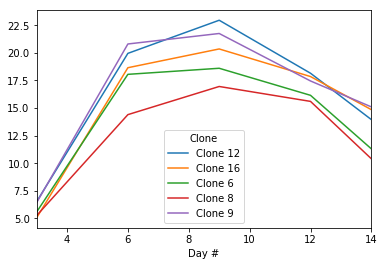

In [112]:
test_mean.pivot("Day #", "Clone", "Viable Cell Density (10e5 cell/ml)").plot()

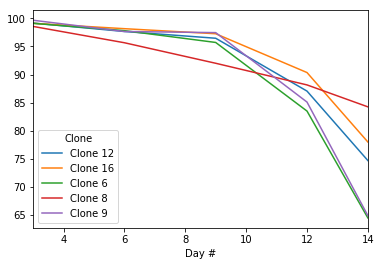

In [117]:
test_mean.pivot("Day #", "Clone", '% Viable ').plot()

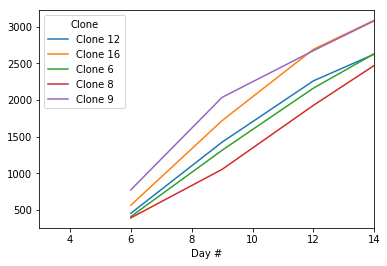

In [118]:
test_mean.pivot("Day #", "Clone", 'Titer (ug/ml)').plot()

In [15]:
df_1 = df_0.stack()

In [16]:
df_1

Parameter                % Viable   ICA ((cells/ml)*day)  Titer (ug/ml)  \
Clone    Flask ID Day #                                                   
Clone 1  SF01     3           97.0                25.860            NaN   
                  6           95.1                63.540          533.9   
                  9           90.5                97.110          947.5   
                  12          71.6               123.315         1269.0   
                  14          62.4               135.030         1442.5   
...                            ...                   ...            ...   
Clone 24 SF48     3           99.4                34.740            NaN   
                  6           94.0                79.590          531.6   
                  9           81.7               119.040         1212.8   
                  12          70.4               153.540         1498.9   
                  14          56.2               168.690         1511.1   

Parameter                Viable Cell Density (10e5 cell/ml)  
Clone    Flask ID Day #                                      
Clone 1  SF01     3                                    4.84  
                  6                                   12.40  
                  9                                   12.72  
                  12                                   9.66  
                  14                                   7.81  
...                                                     ...  
Clone 24 SF48     3                                    6.66  
                  6                                   16.50  
                  9                                   13.40  
                  12                                  12.90  
                  14                                  10.10  

[240 rows x 4 columns]

In [ ]:
df_1.reset_index().pivot("Day #", "Flask ID", "Titer (ug/ml)").plot()

In [ ]:
df_1.reset_index().pivot("Day #", "Flask ID", "Viable Cell Density (10e5 cell/ml)").plot()

In [ ]:
df_1.reset_index().pivot("Day #", "Flask ID", "% Viable ").plot()

In [ ]:
df_1.reset_index(level = 2, inplace  = True )

In [ ]:
a = df_1.groupby("Clone")

In [ ]:
titer = a.mean()["Titer (ug/ml)"]

In [ ]:
titer_sorted = titer.sort_values(ascending = True)

In [ ]:
titer_sorted

In [ ]:
df_1["Viable Cell Density (10e5 cell/ml)"]

In [ ]:
a = df_1.groupby("Clone")

In [ ]:
a.plot("Titer (ug/ml)")

In [ ]:
df_1["Titer (ug/ml)"].plot()

In [ ]:
df_1.plot(x = "Day #" 

In [111]:
matplotlib inline

### names of multi-index, 